In [6]:
import pulp

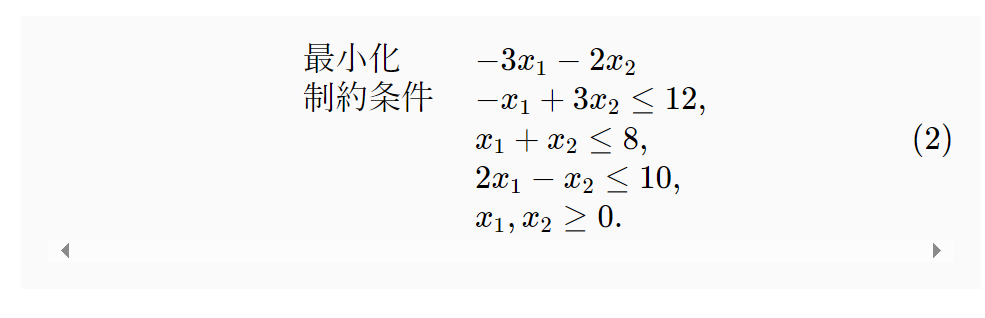

In [7]:
'''
問題を生成するには、LpProblem関数を用います。この関数には、第１引数として"ex1"を与えます。これは、生成する問題の名前を指定する文字列です。
また、第2引数としてLpMinimizeを与えます。LpMinimizeはPuLPで定義された定数なので、頭にpulp.を加えます。
これは、線形計画問題の目的が、目的関数の最大化か最小化かを指定するものです。LpMinimizeで最小化、LpMaximizeで最大化を指定します。
'''
prob = pulp.LpProblem("ex1", pulp.LpMinimize)


# 変数の生成
'''
LpVariable関数の第1引数には、変数の名前を文字列で指定します。lowBound=0は、生成する引数の下限(lower bound)を指定するものです。ここでは0を指定しているので、
𝑥1≥0という制約を課すことになります。
cat=pulp.LpContinuousは、変数の種類を指定するものです。種類を指定するには、cat=に続いて変数の種類を与えます。
ここではLpContinousを与えています。これは連続変数を表します。他に、0-1整数変数を表すLpBinary、整数変数を表すLpIntegerなどがあります。
'''
x1=pulp.LpVariable("x1", lowBound=0, cat=pulp.LpContinuous)
x2=pulp.LpVariable("x2", lowBound=0, cat=pulp.LpContinuous)

# 目的変数の生成
'''
目的関数を設定するには，問題probに演算子+=を用いて線形関数を指定する
'''
prob+=-3*x1-2*x2

'''
表示から最適化問題にどのような条件が設定されているか確認できる
'''
print(prob)


# 制約式を追加
'''
SUBJECT TOが追加された制約式
'''
prob+=-3*x1-2*x2 <= 12
prob+=x1+x2<=8
prob+=2*x1-x2<=10
print(prob)



ex1:
MINIMIZE
-3*x1 + -2*x2 + 0
VARIABLES
x1 Continuous
x2 Continuous

ex1:
MINIMIZE
-3*x1 + -2*x2 + 0
SUBJECT TO
_C1: - 3 x1 - 2 x2 <= 12

_C2: x1 + x2 <= 8

_C3: 2 x1 - x2 <= 10

VARIABLES
x1 Continuous
x2 Continuous



In [8]:
'''
solve関数は，問題を解き，返り値として終了の状態を表すint型の値を返す。
この値を辞書pulp.LpStatusに与えると終了時の状態を表す文字列が得られる。
Optimalが得られていると問題の最適解が得られたということになる
'''
status = prob.solve()
print("終了状態:", pulp.LpStatus[status])

'''
目的関数の最小値をその時の最適解(x1,x2)が得られる
'''
print("最適値:", pulp.value(prob.objective))
print("最適解: (x1,x2)=(", x1.varValue,",",x2.varValue,")")

終了状態: Optimal
最適値: -22.0
最適解: (x1,x2)=( 6.0 , 2.0 )


: 